In [108]:
# conda activate ethical_necromancy
# Check here for the URLs: https://wenmr.science.uu.nl/haddock2.4/workspace

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains
import requests
import re
import os
import time

import pandas as pd
import pdb

ROOT = "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/nanobody_llm_refinement/Haddock_results"
# Setup DataFrame
columns = [
    "Target PDB",
    "URL",
    "Cluster ID",
    "Cluster Ranking",
    "HADDOCK score",
    "Cluster size",
    "RMSD from the overall lowest-energy structure",
    "Van der Waals energy",
    "Electrostatic energy",
    "Desolvation energy",
    "Restraints violation energy",
    "Buried Surface Area",
    "Z-Score",
    "HADDOCK Result PDB Filename",
]
results_df = pd.DataFrame(columns=columns)
TOP_N_CLUSTERS = 5


chromedriver_path = "/Users/yitongtseo/Documents/GitHub/ethical_necromancy/nanobody_design_scratch/chromedriver-mac-x64/chromedriver"
service = Service(executable_path=chromedriver_path)
driver = webdriver.Chrome(service=service)


urls_df = pd.read_csv("/Users/yitongtseo/Documents/GitHub/ethical_necromancy/nanobody_llm_refinement/5h53_HADDOCK_progress_urls.csv")
df = pd.DataFrame()
# # URL of the page to scrape (you might need to adjust this)
# url = 'http://example.com/page'
wait = WebDriverWait(driver, 10)

for idx, row in urls_df.iterrows():
    url = row["URL"].replace("run", "result")
    print(url)
    # Fetch the page
    driver.get(url)

    # Wait for JavaScript to load
    WebDriverWait(driver, 20).until(
        EC.visibility_of_element_located((By.CLASS_NAME, "textblock"))
    )

    # Now you can scrape the content
    clusters = driver.find_elements(By.CLASS_NAME, "textblock")

    for cluster_ranking, cluster in enumerate(clusters):
        if cluster_ranking > TOP_N_CLUSTERS:
            continue
        title = cluster.find_element(By.TAG_NAME, "p").text
        cluster_number = re.search(r"Cluster (\d+)", title)
        if cluster_number:
            cluster_number = cluster_number.group(1)
        else:
            cluster_number = "Unknown"

        cluster_data = {
            "Target PDB": url.split("-")[-1],
            "URL": driver.current_url,
            "Cluster ID": cluster_number,
            "Cluster Ranking": cluster_ranking,
        }
        print("Cluster Data:")
        # Extract cluster data
        table = cluster.find_element(By.TAG_NAME, "table")
        rows = table.find_elements(By.TAG_NAME, "tr")
        for row in rows:
            cells = row.find_elements(By.TAG_NAME, "td")
            if len(cells) == 2:
                key = cells[0].text.strip()
                value = cells[1].text.strip()
                cluster_data[key] = value
                print(f"{key}: {value}")

        driver.execute_script("arguments[0].scrollIntoView(true);", cluster)
        time.sleep(1)  # Allow some time for the browser to scroll

        dropdown = cluster.find_element(By.CLASS_NAME, "dropdown-toggle")
        ActionChains(driver).move_to_element(dropdown).click(dropdown).perform()

        # Wait for the dropdown to open and links to be visible
        try:
            wait.until(EC.visibility_of_element_located((By.LINK_TEXT, "PDB Format")))
            pdb_link = cluster.find_element(By.LINK_TEXT, "PDB Format")
            pdb_url = pdb_link.get_attribute("href")

            # Download the file
            pdb_response = requests.get(pdb_url)
            result_pdb_filename = os.path.join(
                ROOT, f"{cluster_data['Target PDB']}_cluster{cluster_ranking}.pdb"
            )
            with open(result_pdb_filename, "wb") as f:
                f.write(pdb_response.content)
            cluster_data["HADDOCK Result PDB Filename"] = result_pdb_filename

        except Exception as e:
            cluster_data["HADDOCK Result PDB Filename"] = "Failed to download"
            print(f"Error downloading: {e}")

        results_df = pd.concat(
            [results_df, pd.DataFrame([cluster_data])], ignore_index=True
        )
        print("------\n")

    results_df.to_csv("idx0_5h53_results.csv", index=False)

# Close the browser
driver.quit()


https://rascar.science.uu.nl/haddock2.4/result/6886575225/385816-MyoHead_0_A102T_None
Cluster Data:
HADDOCK score: -81.6 +/- 2.5
Cluster size: 30
RMSD from the overall lowest-energy structure: 8.5 +/- 0.1
Van der Waals energy: -75.5 +/- 3.9
Electrostatic energy: -263.1 +/- 49.7
Desolvation energy: 18.6 +/- 3.9
Restraints violation energy: 279.6 +/- 52.8
Buried Surface Area: 2035.8 +/- 82.8
Z-Score: -1.0
------

Cluster Data:
HADDOCK score: -79.8 +/- 13.5
Cluster size: 4
RMSD from the overall lowest-energy structure: 0.6 +/- 0.3
Van der Waals energy: -83.2 +/- 1.8
Electrostatic energy: -248.8 +/- 25.2
Desolvation energy: 16.8 +/- 3.7
Restraints violation energy: 362.8 +/- 57.7
Buried Surface Area: 2118.2 +/- 51.1
Z-Score: -0.8


NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=128.0.6613.120)
Stacktrace:
0   chromedriver                        0x0000000109474c68 chromedriver + 5094504
1   chromedriver                        0x000000010946c4ea chromedriver + 5059818
2   chromedriver                        0x0000000108ff7fd0 chromedriver + 389072
3   chromedriver                        0x0000000108fcf3ef chromedriver + 222191
4   chromedriver                        0x0000000109070fcd chromedriver + 884685
5   chromedriver                        0x0000000109085c49 chromedriver + 969801
6   chromedriver                        0x0000000109068c93 chromedriver + 851091
7   chromedriver                        0x0000000109037c79 chromedriver + 650361
8   chromedriver                        0x000000010903849e chromedriver + 652446
9   chromedriver                        0x0000000109437a30 chromedriver + 4844080
10  chromedriver                        0x000000010943c948 chromedriver + 4864328
11  chromedriver                        0x000000010943d015 chromedriver + 4866069
12  chromedriver                        0x000000010941a679 chromedriver + 4724345
13  chromedriver                        0x000000010943d309 chromedriver + 4866825
14  chromedriver                        0x000000010940c594 chromedriver + 4666772
15  chromedriver                        0x000000010945c7e8 chromedriver + 4995048
16  chromedriver                        0x000000010945c9e7 chromedriver + 4995559
17  chromedriver                        0x000000010946c0ee chromedriver + 5058798
18  libsystem_pthread.dylib             0x00007ff80105118b _pthread_start + 99
19  libsystem_pthread.dylib             0x00007ff80104cae3 thread_start + 15


In [123]:
results_df = pd.read_csv('/Users/yitongtseo/Documents/GitHub/ethical_necromancy/nanobody_llm_refinement/idx0_5h53_results.csv')

In [124]:
df_sorted = results_df.sort_values(by='HADDOCK score', ascending=False) 
df_deduped = df_sorted.drop_duplicates(subset='Target PDB', keep='first') 
df_deduped

,Target PDB,URL,Cluster ID,Cluster Ranking,HADDOCK score,Cluster size,RMSD from the overall lowest-energy structure,Van der Waals energy,Electrostatic energy,Desolvation energy,Restraints violation energy,Buried Surface Area,Z-Score,HADDOCK Result PDB Filename
107,MyoHead_0_None_None,https://rascar.science.uu.nl/haddock2.4/result...,1,0,-99.0 +/- 5.1,92,8.6 +/- 0.2,-95.7 +/- 3.4,-262.2 +/- 28.5,19.7 +/- 4.7,295.0 +/- 49.8,2240.7 +/- 47.6,-1.4,/Users/yitongtseo/Documents/GitHub/ethical_nec...
118,MyoHead_0_N100D_A102R,https://rascar.science.uu.nl/haddock2.4/result...,1,0,-98.7 +/- 5.0,67,0.5 +/- 0.3,-99.7 +/- 8.0,-306.2 +/- 28.4,25.5 +/- 3.5,367.7 +/- 40.8,2166.5 +/- 65.0,-1.2,/Users/yitongtseo/Documents/GitHub/ethical_nec...
143,MyoHead_0_A102R_L114M,https://rascar.science.uu.nl/haddock2.4/result...,3,1,-98.2 +/- 7.7,7,5.6 +/- 0.3,-103.3 +/- 8.1,-251.8 +/- 26.9,24.3 +/- 3.8,311.5 +/- 26.8,2342.2 +/- 92.5,-0.3,/Users/yitongtseo/Documents/GitHub/ethical_nec...
66,MyoHead_0_A102V_L114M,https://rascar.science.uu.nl/haddock2.4/result...,1,0,-98.0 +/- 2.7,81,1.0 +/- 0.6,-99.3 +/- 4.5,-277.9 +/- 22.5,18.7 +/- 5.3,381.7 +/- 72.0,2204.4 +/- 59.1,-1.5,/Users/yitongtseo/Documents/GitHub/ethical_nec...
124,MyoHead_0_A102I_L114M,https://rascar.science.uu.nl/haddock2.4/result...,1,0,-96.7 +/- 4.6,85,4.0 +/- 0.3,-90.1 +/- 6.7,-253.9 +/- 21.2,17.8 +/- 8.4,264.3 +/- 36.8,2129.0 +/- 107.0,-1.4,/Users/yitongtseo/Documents/GitHub/ethical_nec...
78,MyoHead_0_N100D_None,https://rascar.science.uu.nl/haddock2.4/result...,1,0,-96.5 +/- 2.0,96,2.1 +/- 1.2,-93.0 +/- 5.0,-264.9 +/- 20.7,17.3 +/- 4.3,321.1 +/- 53.3,2169.2 +/- 147.4,-2.0,/Users/yitongtseo/Documents/GitHub/ethical_nec...
112,MyoHead_0_A102V_L96A,https://rascar.science.uu.nl/haddock2.4/result...,2,0,-96.4 +/- 7.1,30,1.0 +/- 0.9,-97.7 +/- 8.1,-228.1 +/- 32.2,13.9 +/- 1.7,330.8 +/- 63.4,2219.2 +/- 131.4,-1.8,/Users/yitongtseo/Documents/GitHub/ethical_nec...
146,MyoHead_0_N100D_A102I,https://rascar.science.uu.nl/haddock2.4/result...,2,0,-96.2 +/- 3.9,52,5.8 +/- 0.5,-89.2 +/- 2.8,-288.9 +/- 36.5,20.3 +/- 5.5,304.2 +/- 106.3,2209.7 +/- 62.8,-2.0,/Users/yitongtseo/Documents/GitHub/ethical_nec...
18,MyoHead_0_L96A_None,https://rascar.science.uu.nl/haddock2.4/result...,2,0,-95.3 +/- 1.4,40,2.7 +/- 0.2,-92.2 +/- 5.6,-258.1 +/- 10.7,17.3 +/- 4.5,312.8 +/- 33.4,2098.6 +/- 142.3,-1.4,/Users/yitongtseo/Documents/GitHub/ethical_nec...
12,MyoHead_0_A102I_None,https://rascar.science.uu.nl/haddock2.4/result...,1,0,-95.0 +/- 2.4,90,4.0 +/- 0.2,-88.1 +/- 6.8,-265.6 +/- 27.5,17.1 +/- 4.3,291.0 +/- 30.6,2145.2 +/- 99.6,-1.7,/Users/yitongtseo/Documents/GitHub/ethical_nec...


In [125]:
df_deduped["Mutations"] = df_deduped["Target PDB"].apply(
    lambda x: [mut if mut != "None" else "WT" for mut in x.split("_")[-2:]]
)

import itertools

mutations = list(set(itertools.chain(*df_deduped["Mutations"].to_list())))
mutations.remove('WT')
mutations = ['WT'] + mutations

/var/folders/_t/vlf4bw_n38x9ytx94_479wt80000gp/T/ipykernel_67554/164906834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deduped["Mutations"] = df_deduped["Target PDB"].apply(


In [130]:
import numpy as np
def convert_value(string_rep):
    return float(string_rep.split('+/-')[0])

matrix_df = pd.DataFrame(index=mutations, columns=mutations) 

for row in mutations: 
    for col in mutations:
        muts = df_deduped['Mutations'].to_list()
        if row == col and [row] in muts:
            matrix_df.at[row, col] = convert_value(df_deduped.iloc[muts.index([row])]['HADDOCK score'])
        elif [row, col] in muts:
            matrix_df.at[row, col] = convert_value(df_deduped.iloc[muts.index([row, col])]['HADDOCK score'])
        elif [col, row] in muts:
            matrix_df.at[row, col] = convert_value(df_deduped.iloc[muts.index([col, row])]['HADDOCK score'])
        else:
            matrix_df.at[row, col] = np.nan
matrix_df = matrix_df.applymap(lambda x: pd.to_numeric(x, errors='coerce'))
matrix_df
### 2. Populate the DataFrame Assuming you have a way to get the value for each cell (e.g., from a function or a list of values), you can then iterate over the rows and columns to fill in the DataFrame. Here, I'll provide a generic example where you manually populate the DataFrame: ```python # Example function to get values (replace with your actual method to get values) def get_value(row, col): # Replace this with your actual logic to determine the value return f"Value for ({row}, {col})" # Iterate through each row and column to populate the DataFrame for row in mutations: for col in mutations: df.at[row, col] = get_value(row, col) # Print the DataFrame print(df) ```

[['WT', 'WT'], ['N100D', 'A102R'], ['A102R', 'L114M'], ['A102V', 'L114M'], ['A102I', 'L114M'], ['N100D', 'WT'], ['A102V', 'L96A'], ['N100D', 'A102I'], ['L96A', 'WT'], ['A102I', 'WT'], ['A102T', 'L114M'], ['N100D', 'A102T'], ['A102R', 'WT'], ['N100D', 'A102H'], ['L96A', 'L114M'], ['L114M', 'A102H'], ['A102T', 'L96A'], ['L96A', 'A102H'], ['A102R', 'L96A'], ['A102H', 'WT'], ['N100D', 'L114M'], ['A102I', 'L96A'], ['A102V', 'WT'], ['A102T', 'WT'], ['A102V', 'N100D'], ['N100D', 'L96A'], ['L114M', 'WT']]
[['WT', 'WT'], ['N100D', 'A102R'], ['A102R', 'L114M'], ['A102V', 'L114M'], ['A102I', 'L114M'], ['N100D', 'WT'], ['A102V', 'L96A'], ['N100D', 'A102I'], ['L96A', 'WT'], ['A102I', 'WT'], ['A102T', 'L114M'], ['N100D', 'A102T'], ['A102R', 'WT'], ['N100D', 'A102H'], ['L96A', 'L114M'], ['L114M', 'A102H'], ['A102T', 'L96A'], ['L96A', 'A102H'], ['A102R', 'L96A'], ['A102H', 'WT'], ['N100D', 'L114M'], ['A102I', 'L96A'], ['A102V', 'WT'], ['A102T', 'WT'], ['A102V', 'N100D'], ['N100D', 'L96A'], ['L114M', '

ValueError: ['WT', 'A102V'] is not in list

In [116]:
upper_triangle_mask = ~np.tril(np.ones_like(matrix_df, dtype=bool), k=0)
# nan_mask = matrix_df.isnull()
# combined_mask = upper_triangle_mask & nan_mask.values
# combined_mask

<Axes: >

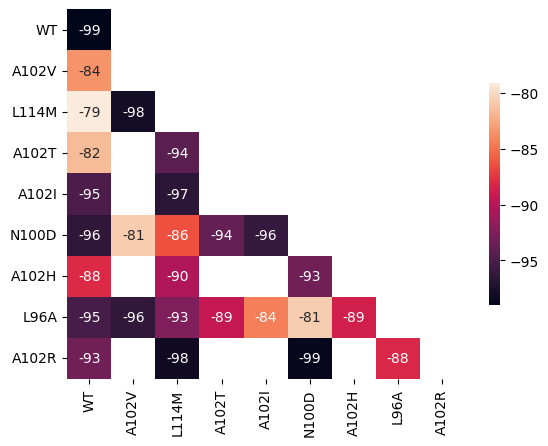

In [117]:
import seaborn as sns
sns.heatmap(matrix_df, annot=True, cbar=True, mask=upper_triangle_mask, cbar_kws={'shrink': 0.6}, xticklabels=1, yticklabels=1,)
